In [7]:
import numpy as np
import random
import cv2
import os
import tensorflow as tf
import matplotlib.pyplot as plt

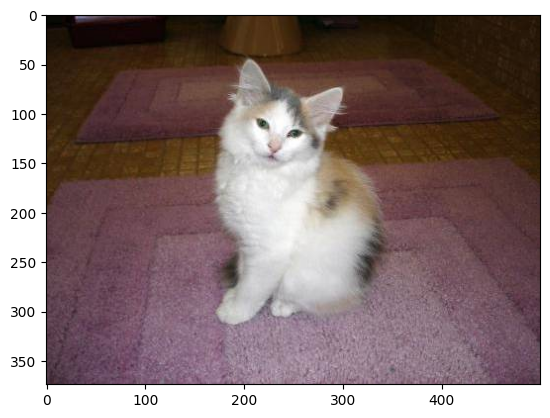

In [8]:
img = plt.imread('test1/10.jpg')
plt.imshow(img, cmap='gray')
plt.show()

In [9]:
def prepare_image_data(dir):
    img_size = 100
    data = []
    labels = {'cat' : 0, 'dog' : 1}

    for img in os.listdir(dir):
        label_str = img.split('.')[0]
        label = labels.get(label_str)
        if label is None:
            continue
        try:
            img_array = cv2.imread(os.path.join(dir, img), cv2.IMREAD_GRAYSCALE)
            new_array = cv2.resize(img_array, (img_size, img_size))
            data.append([new_array, label])

        except Exception as e:
            pass

    return data

In [10]:
training_data = prepare_image_data("train/")

In [11]:
len(training_data)

25000

In [12]:
training_data[:1]

[[array([[101,  74, 113, ...,  85, 126, 106],
         [ 75,  75,  84, ...,  68,  86,  94],
         [104,  79,  87, ...,  64,  60,  87],
         ...,
         [128, 139, 138, ...,  33,  49,  62],
         [125, 135, 147, ...,  79,  53,  61],
         [117, 135, 143, ...,  91,  92,  42]], dtype=uint8),
  1]]

In [13]:
test_data = []
test_dir = "test1/"

for img in os.listdir(test_dir):
    img_array = cv2.imread(os.path.join(test_dir, img), cv2.IMREAD_GRAYSCALE)
    new_array = cv2.resize(img_array, (100, 100))
    test_data.append([new_array])

In [14]:
len(test_data)

12500

In [15]:
# Shuffel Data

random.shuffle(training_data)
random.shuffle(test_data)
training_data[:1]

[[array([[ 51,  84,  56, ..., 156, 173, 174],
         [102,  61,  65, ..., 109, 151, 151],
         [ 48,  66,  59, ..., 102,  97, 111],
         ...,
         [ 29,  55,  53, ...,  55,  76,  55],
         [ 61,  47,  37, ...,  60,  78,  57],
         [ 58,  66,  35, ...,  62,  60,  55]], dtype=uint8),
  1]]

In [16]:
test_data = np.array(test_data)
test_data.shape

(12500, 1, 100, 100)

In [17]:
# Splite X, y

x = []
y = []

for feature, label in training_data:
    x.append(feature)
    y.append(label)

x = np.array(x)
y = np.array(y)

In [18]:
y[:10]

array([1, 1, 1, 0, 1, 1, 0, 1, 1, 0])

In [19]:
x.shape

(25000, 100, 100)

In [20]:
# Resize and scale
x = x.reshape(-1, 100, 100, 1) / 255.0
test_data = test_data.reshape(-1, 100, 100, 1) / 255.0

In [21]:
x.shape

(25000, 100, 100, 1)

In [22]:
test_data.shape

(12500, 100, 100, 1)

In [23]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=.2, random_state=42)

In [24]:
x_val.shape

(5000, 100, 100, 1)

### CNN

In [25]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, MaxPooling2D, Flatten

model = Sequential()

model.add(Conv2D(64, (3,3), activation='relu', input_shape=x.shape[1:]))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(512, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128))
model.add(Dropout(0.40))

model.add(Dense(1, activation='sigmoid'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
# Model summary

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 98, 98, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 49, 49, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 47, 47, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 23, 23, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 21, 21, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 10, 10, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 8, 8, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 4, 4, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     1,048,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,598,657 (9.91 MB)

 Trainable params: 2,598,657 (9.91 MB)

 Non-trainable params: 0 (0.00 B)

In [27]:
model.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [28]:
# Fit Model

model.fit(x_train, y_train, batch_size=64, epochs=20, validation_data=(x_val, y_val))

Epoch 1/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 82ms/step - accuracy: 0.5347 - loss: 0.6958 - val_accuracy: 0.6424 - val_loss: 0.6355
Epoch 2/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.6612 - loss: 0.6187 - val_accuracy: 0.7454 - val_loss: 0.5382
Epoch 3/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.7252 - loss: 0.5391 - val_accuracy: 0.7810 - val_loss: 0.4646
Epoch 4/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.7787 - loss: 0.4695 - val_accuracy: 0.8174 - val_loss: 0.4008
Epoch 5/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 55ms/step - accuracy: 0.8037 - loss: 0.4158 - val_accuracy: 0.8294 - val_loss: 0.3740
Epoch 6/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8299 - loss: 0.3787 - val_accuracy: 0.8480 - val_loss: 0.3446
Epoch 7/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8458 - loss: 0.3489 - val_accuracy: 0.8552 - val_loss: 0.3171
Epoch 8/20
313/313 ━━━━━━━━━━━━━━━━━━━━ 17s 53ms/step - accuracy: 0.8643 - loss: 0.3154 - 

In [29]:
model.save(r'model_xray.h5')

In [30]:
import matplotlib.image as mpimg
from tensorflow.keras.models import load_model

model = load_model('cat_dog.h5')

prediction = model.predict(test_data[:1])
print(prediction)
print(round(prediction[0][0]))

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 615ms/step
[[0.27568975]]
0


In [32]:
# 11550.jpg  1907.jpg   3514.jpg	5121.jpg  672.jpg   8337.jpg  9945.jpg
# 11551.jpg  1908.jpg   3515.jpg	5122.jpg  6730.jpg  8338.jpg  9946.jpg
# 11552.jpg  1909.jpg   3516.jpg	5123.jpg  6731.jpg  8339.jpg  9947.jpg
# 11553.jpg  190.jpg    3517.jpg	5124.jpg  6732.jpg  833.jpg   9948.jpg
# 11554.jpg  1910.jpg   3518.jpg	5125.jpg  6733.jpg  8340.jpg  9949.jpg
# 11555.jpg  1911.jpg   3519.jpg	5126.jpg  6734.jpg  8341.jpg  994.jpg
# 11556.jpg  1912.jpg   351.jpg	    5127.jpg  6735.jpg  8342.jpg  9950.jpg
# 11557.jpg  1913.jpg   3520.jpg	5128.jpg  6736.jpg  8343.jpg  9951.jpg
# 11558.jpg  1914.jpg   3521.jpg	5129.jpg  6737.jpg  8344.jpg  9952.jpg
# 11559.jpg  1915.jpg   3522.jpg	512.jpg   6738.jpg  8345.jpg  9953.jpg
# 1155.jpg   1916.jpg   3523.jpg	5130.jpg  6739.jpg  8346.jpg  9954.jpg
# 11560.jpg  1917.jpg   3524.jpg	5131.jpg  673.jpg   8347.jpg  9955.jpg

In [33]:
def prepare_external_image(image_path):
    import cv2
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (100, 100))
    img = img / 255.0
    return img.reshape(1, 100, 100, 1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1


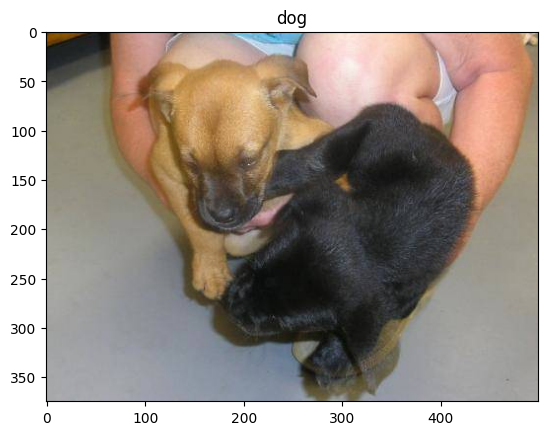

In [57]:
image = 'test1/3519.jpg'
prediction = model.predict(prepare_external_image(image))
pred_label = round(prediction[0][0])

print(round(prediction[0][0]))
label = "dog" if pred_label == 1 else "cat"

img = plt.imread(image)
plt.imshow(img, cmap='gray')
plt.title(label)
plt.show()

In [35]:
loss, accuracy = model.evaluate(x_val, y_val)
print(f"Accuracy: {accuracy:.4f}")

157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9012 - loss: 0.2304
Accuracy: 0.9018
